In [1]:
import re
import string
import numpy as np
import pandas as pd
import itertools
import io
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1000 leads.xlsx to 1000 leads.xlsx


In [3]:
df=pd.read_excel(io.BytesIO(uploaded['1000 leads.xlsx']))
df.head()

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [4]:
df=df.rename(columns=str.lower)

In [5]:
#checking the shape of data
df.shape

(1001, 4)

In [6]:
df.isnull().sum()

lead name              0
location              21
status                 3
status information    24
dtype: int64

In [7]:
## Dropping the unnamed column

##df=df.drop('unnamed: 4',axis=1)

In [8]:
df['location'].value_counts()

bangalore        339
hyderabad        237
pune              84
mumbai            77
delhi             63
Hyderabad         26
chennai           22
Bangalore         15
noida             12
Mumbai            11
gurgoan           10
gurgaon            8
USA                8
Pune               4
india              4
vishakapatnam      4
Chennai            4
vijayawada         3
ahmedabad          3
guntur             3
coimbatore         3
ghazibad           2
kolkatta           2
thane              2
Online             2
australia          2
nagpur             2
khammam            1
kerala             1
bihar              1
Gurgaon            1
Nepal              1
ongole             1
gujarat            1
jaipur             1
meerut             1
madurai            1
India              1
mysore             1
Vijayawada         1
hubli              1
kochi              1
aurangabad         1
kadapa             1
Rajamundry         1
jalandhar          1
bilgi              1
rayagada     

In [9]:
df["location"].describe()

count           980
unique           55
top       bangalore
freq            339
Name: location, dtype: object

In [10]:
df.columns

Index(['lead name', 'location', 'status ', 'status information'], dtype='object')

In [11]:
df["status "].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan, 'Conveted'],
      dtype=object)

In [12]:
# making the status & location column strings to upper case
df["status "] = df["status "].str.upper()
df["location"] = df["location"].str.upper()

In [13]:
df["status "].unique()

array(['NOT CONVERTED', 'CONVERTED ', nan, 'CONVETED'], dtype=object)

In [14]:
df["status "]=df["status "].replace('CONVETED','CONVERTED ')

In [15]:
df["status "].unique()

array(['NOT CONVERTED', 'CONVERTED ', nan], dtype=object)

In [16]:
import numpy as np

In [17]:
# asking python to read the given values as missing values/ null values.
#BEGIN CUSTOM CODE BELOW...
# asking python to read the given values as missing values/ null values.
missing_value = ["nan","#DIV/0!",'Missing Values','Missing',' ','-','NA','N/A','NaN','na','#ref', np.nan] 
df = df.replace(["nan","#DIV/0!",'Missing Values','Missing',' ','-','NA','N/A','NaN','na','#ref'],[np.nan]*11)

#Finding which columns has missing values
print('Columns and corresponding null values are:\n', df.isnull().sum().sort_values(ascending = False))

# Filling the NULL values in 'CUS_Month_Income' with mean 
df["location"].fillna('BANGALORE',inplace=True)
df["status "].fillna('CONVERTED ',inplace=True)
df["status information"].fillna('mail shared',inplace=True)
#Checking if any null values exist
print('After DATA CLEANING:\n The Sum of Null Values In The Data Set is:', df.isnull().sum().sum())

Columns and corresponding null values are:
 status information    24
location              21
status                 3
lead name              0
dtype: int64
After DATA CLEANING:
 The Sum of Null Values In The Data Set is: 0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.columns

Index(['lead name', 'location', 'status ', 'status information'], dtype='object')

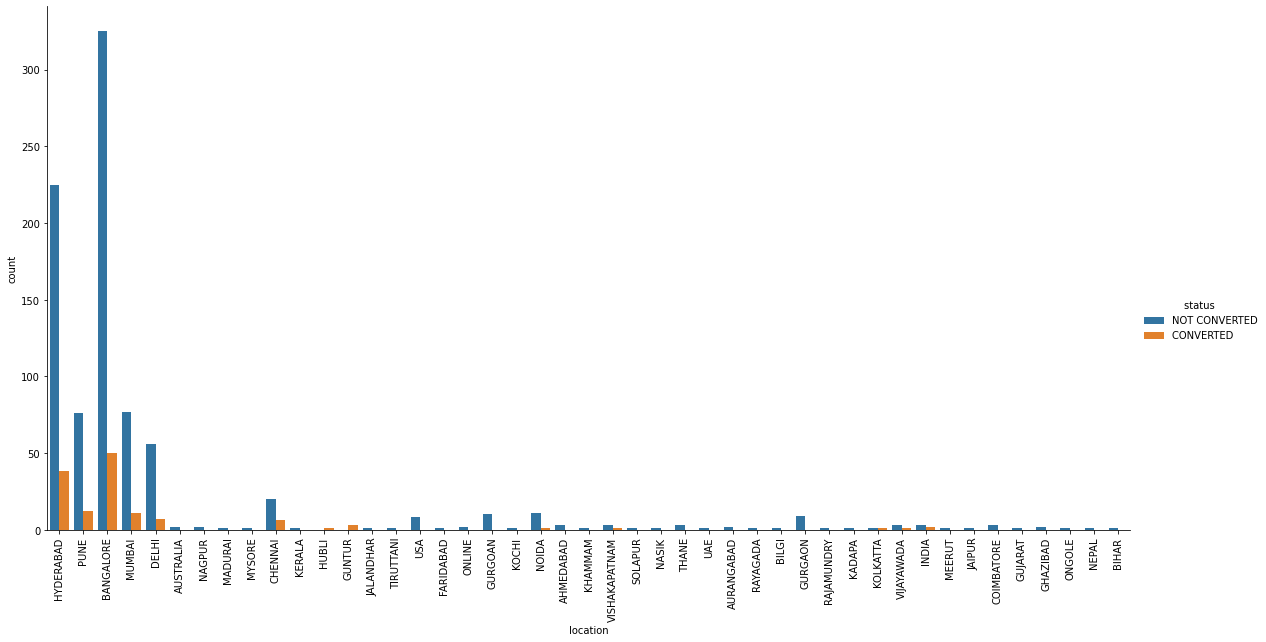

In [20]:
g=sns.catplot(x = 'location', data = df, kind = 'count',hue='status ',height=8,aspect=2)
g.set_xticklabels(rotation=90)

Observation: Most of the non converted consumers are from Bangalore follwed by hyderabad,pune,mumbai and delhi also the most converted customers are from the Bangalore location followed by hyderabad,pune and mumbai

In [21]:
df.groupby('status ').describe()

lead name                     location                         \
                  count unique     top freq    count unique        top freq   
status                                                                        
CONVERTED           134    130  Rashmi    2      134     13  BANGALORE   50   
NOT CONVERTED       867    765  Suresh    5      867     43  BANGALORE  325   

              status information                           
                           count unique          top freq  
status                                                     
CONVERTED                    134    133  mail shared    2  
NOT CONVERTED                867    840  mail shared   25

In [22]:
# converting string labels to int labels

label_map = {
    'CONVERTED ': 0,
    'NOT CONVERTED': 1,
}

df['status '] = df['status '].map(label_map)
df.head()

,lead name,location,status,status information
0,Raja,HYDERABAD,1,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,PUNE,1,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,BANGALORE,0,16|AuG|moHan:rnr
3,suresh,MUMBAI,1,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,HYDERABAD,1,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [23]:
df.columns

Index(['lead name', 'location', 'status ', 'status information'], dtype='object')

In [24]:
# calculating length of each record in our df
df['length'] = df['status information'].apply(lambda x: len(x))
df.head()

,lead name,location,status,status information,length
0,Raja,HYDERABAD,1,"14/8/prema: share me details, available in evn...",133
1,Anirudh Reddy,PUNE,1,"14/8/prema: cal me tmrw, shared details to ema...",171
2,Sapna Dewani,BANGALORE,0,16|AuG|moHan:rnr,16
3,suresh,MUMBAI,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,86
4,Akshay Shinde,HYDERABAD,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",118


In [25]:
df['status '].unique()

array([1, 0])

In [26]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [27]:
df['status information'] = df['status information'].apply(lambda x: convert_to_lower(x))
df['status information'] = df['status information'].apply(lambda x: remove_numbers(x))
df['status information'] = df['status information'].apply(lambda x: remove_punctuation(x))
df['status information'] = df['status information'].apply(lambda x: remove_stopwords(x))
df['status information'] = df['status information'].apply(lambda x: remove_extra_white_spaces(x))
df['status information'] = df['status information'].apply(lambda x: lemmatizing(x))

In [28]:
# calculating length of each record after performing text cleaning
df['length_after_cleaning'] = df['status information'].apply(lambda x: len(x))
df.head()

,lead name,location,status,status information,length,length_after_cleaning
0,Raja,HYDERABAD,1,prema share detail available evng prema postpo...,133,90
1,Anirudh Reddy,PUNE,1,prema cal tmrw shared detail email prema share...,171,122
2,Sapna Dewani,BANGALORE,0,augmohanrnr,16,11
3,suresh,MUMBAI,1,surendrai want server augmohancal busy augmoha...,86,57
4,Akshay Shinde,HYDERABAD,1,premarnr prema gave info said revert hr prema ...,118,78


In [29]:
feedback=df.copy()

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(feedback)):
    review = re.sub('[^a-zA-Z]', ' ', df['status information'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [31]:
corpus[50]

'augmohan cal latr'

In [32]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [33]:
X.shape

(1001, 5000)

In [34]:
y=feedback['status ']

In [35]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [36]:
cv.get_feature_names()[:50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abdul',
 'abroad',
 'abt',
 'accept',
 'accept call',
 'addr',
 'address',
 'afternoon',
 'afternoon pm',
 'afterward',
 'aftr',
 'aftr hr',
 'aftr juli',
 'aftr mnth',
 'aftr week',
 'agenda',
 'alreadi',
 'alreadi discuss',
 'alreadi discuss iam',
 'alreadi done',
 'alreadi enrol',
 'alreadi enrol institut',
 'alreadi join',
 'also',
 'also interest',
 'amar',
 'amar rnr',
 'analysi',
 'analyst',
 'analyt',
 'anoth',
 'anoth inst',
 'anoth institut',
 'approv',
 'approv manag',
 'aprmohanc',
 'aprmohanc wi',
 'aprmohanh',
 'aprmohanh come',
 'aprmohanh want',
 'aprmohanintrstd',
 'aprmohannot',
 'aprmohannot reachbl',
 'aprmohanrnr',
 'aprmohanrnr aprmohanrnr',
 'aprmohanrnr maymohanc',
 'area',
 'area prema',
 'area prema coverag',
 'area prema rnr']

In [37]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
count_df.head()

,abdul,abroad,abt,accept,accept call,addr,address,afternoon,afternoon pm,afterward,...,would,wrk,wrong,yet,yet check,yet check revert,yet decid,yr,yr exp,ystday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
classifier=MultinomialNB()

accuracy:   0.814
Confusion matrix, without normalization


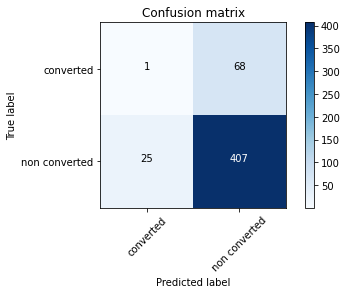

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['converted', 'non converted'])

In [44]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print("Classification Report")
print(classification_report(y_test, pred))

Confusion Matrix:
[[  1  68]
 [ 25 407]]
Classification Report
              precision    recall  f1-score   support

           0       0.04      0.01      0.02        69
           1       0.86      0.94      0.90       432

    accuracy                           0.81       501
   macro avg       0.45      0.48      0.46       501
weighted avg       0.74      0.81      0.78       501



**With Augmentation**

In [45]:
!pip install transformers
!pip install nlpaug

     |████████████████████████████████| 3.8 MB 30.5 MB/s 
     |████████████████████████████████| 596 kB 57.1 MB/s 
     |████████████████████████████████| 6.5 MB 52.2 MB/s 
     |████████████████████████████████| 895 kB 49.3 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 410 kB 25.5 MB/s 


In [46]:
import nlpaug.augmenter.word.context_word_embs as aug

In [47]:
sample_text = df['status information'].iloc[100]

In [48]:
sample_text

'somarnrdetails shared'

In [49]:
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [50]:
augmented_sample_text = augmenter.augment(sample_text)

In [51]:
augmented_sample_text

'his somarnrdetails have shared'

In [52]:
for i in range(5):
    print(augmenter.augment(sample_text))

the somarnrdetails are shared
and somarnrdetails being shared
the somarnrdetails who shared
many somarnrdetails have shared
the somarnrdetails was shared


In [53]:
df['status '].value_counts()

1    867
0    134
Name: status , dtype: int64

In [54]:
def augmentMyData(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    converted_df = df[df['status '] == 0].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(converted_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(converted_df['status information'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'status ': 0,
        'status information': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [55]:
new_df = df.drop(labels=['length', 'length_after_cleaning'], axis=1)
new_df.head()

,lead name,location,status,status information
0,Raja,HYDERABAD,1,prema share detail available evng prema postpo...
1,Anirudh Reddy,PUNE,1,prema cal tmrw shared detail email prema share...
2,Sapna Dewani,BANGALORE,0,augmohanrnr
3,suresh,MUMBAI,1,surendrai want server augmohancal busy augmoha...
4,Akshay Shinde,HYDERABAD,1,premarnr prema gave info said revert hr prema ...


In [56]:
aug_df = augmentMyData(new_df, augmenter, samples=700)

  0%|          | 0/700 [00:00<?, ?it/s]

In [57]:
aug_df['status '].value_counts()

1    867
0    834
Name: status , dtype: int64

In [58]:
print("Original: ", df.shape)
print("Augmented: ", aug_df.shape)

Original:  (1001, 6)
Augmented:  (1701, 4)


In [59]:
# split the dataset before augmenting to avoid augmented data in valid set
X_train, _, y_train, _ = train_test_split(aug_df['status information'], aug_df['status '].values, test_size=0.1)
_, X_test, _, y_test = train_test_split(df['status information'], df['status '].values, test_size=0.5)

In [60]:
tf_with_aug = TfidfVectorizer()
X_train_tf = tf_with_aug.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

In [61]:
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [62]:
X_test_tf = tf_with_aug.transform(X_test)
X_test_tf = X_test_tf.toarray()

In [63]:
X_train_tf.shape, X_test_tf.shape

((1530, 2111), (501, 2111))

In [64]:
y_preds = nb.predict(X_test_tf)

In [65]:
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[ 50  17]
 [ 10 424]]
0.9461077844311377
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        67
           1       0.96      0.98      0.97       434

    accuracy                           0.95       501
   macro avg       0.90      0.86      0.88       501
weighted avg       0.94      0.95      0.94       501

